In [1]:
import pickle

with open('../../PNC_Good/MegaMeta3.pkl', 'rb') as f: 
    meta = pickle.load(f)
    
print('Complete')

Complete


In [2]:
with open('../../Work/LatentSim/Splits.pkl', 'rb') as f:
    keys, groups = pickle.load(f)
    
print(len(keys))
print(len(groups[0][0])+len(groups[0][1]))
print('Complete')

620
620
Complete


In [3]:
import numpy as np

nback = np.stack([meta[key]['nback'] for key in keys])
emoid = np.stack([meta[key]['emoid'] for key in keys])

print(nback.shape)
print(emoid.shape)

(620, 264, 231)
(620, 264, 210)


In [79]:
age = np.stack([meta[key]['AgeInMonths'] for key in keys])
gen = np.stack([np.array([meta[key]['Gender'] == 'M', meta[key]['Gender'] == 'F']) for key in keys]).astype(int)
wrt = np.stack([meta[key]['wratStd'] for key in keys])

print(age.shape)
print(gen.shape)
print(wrt.shape)

age_t = torch.from_numpy(age).float().cuda()
gen_t = torch.from_numpy(gen).float().cuda()
wrt_t = torch.from_numpy(wrt).float().cuda()

print('Complete')

(620,)
(620, 2)
(620,)
Complete


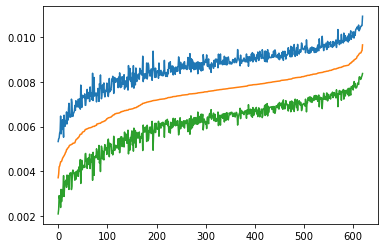

In [4]:
# Get timeseries stats

import matplotlib.pyplot as plt

nb2 = np.mean(emoid**2, axis=2)
nb1mu = np.mean(nb2, axis=1)
nb1sd = np.std(nb2, axis=1)

idcs = np.argsort(nb1mu)

nb1mu = nb1mu[idcs]
nb1sd = nb1sd[idcs]

plt.plot(nb1mu+nb1sd)
plt.plot(nb1mu)
plt.plot(nb1mu-nb1sd)
plt.show()

In [5]:
import torch

nback_t = torch.from_numpy(nback).float().cuda()
emoid_t = torch.from_numpy(emoid).float().cuda()

print('Complete')

Complete


In [6]:
roi = 186
before = 1

A = nback_t[:,:,:-before].clone()
A = torch.cat([A[:,:roi,:],A[:,roi+1:,:]], dim=1)
A = A.permute(0,2,1)
A = A.reshape(620*(231-before),263)
B = nback_t[:,roi,before:]
B = B.reshape(620*(231-before))

w, err, _, _ = torch.linalg.lstsq(A,B)
# w = torch.cat([w[:roi],torch.zeros(1).float().cuda(),w[roi:]])

print(w.shape)

torch.Size([263])


In [183]:
Bhat = A@w
nbhat = Bhat.reshape(620,(231-before))

print('Complete')

Complete


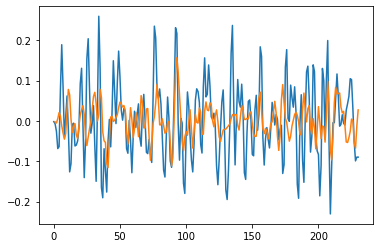

In [185]:
subj = 243

plt.plot(nback[subj,roi])
plt.plot(np.arange(before,231),nbhat[subj].detach().cpu())
plt.show()

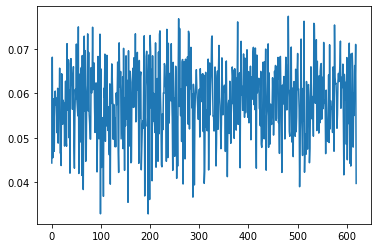

In [191]:
plt.plot(np.mean(np.abs(nbhat.detach().cpu().numpy()-nback[:,roi,before:]),axis=1))
plt.show()

In [327]:
subws = np.zeros((620,264,264))

for sub in range(620):
    ws = np.zeros((264,264))
    before = 1
    alpha = 5e1

    for roi in np.arange(264):
        A = nback_t[sub,:,:-before].clone()
        A = torch.cat([A[:roi,:],A[roi+1:,:]])
        A = A.T
        C = emoid_t[sub,:,:-before].clone()
        C = torch.cat([C[:roi,:],C[roi+1:,:]])
        C = C.T
        A = torch.cat([A,C])
        B = nback_t[sub,roi,before:]
        D = emoid_t[sub,roi,before:]
        B = torch.cat([B,D])
        B = A.T@B
        A = A.T@A+alpha*torch.eye(263).float().cuda()

        w, err, _, _ = torch.linalg.lstsq(A,B)
        w = w.detach().cpu().numpy()

        ws[roi,:roi] = w[:roi]
        ws[roi,roi] = 0
        ws[roi,roi+1:] = w[roi:]

    #     if roi % 10 == 0:
    #         print(f'Finished {roi}')

    subws[sub] = ws
    print(f'Done {sub} {ws.shape}')
    
print('Complete')

Done 0 (264, 264)
Done 1 (264, 264)
Done 2 (264, 264)
Done 3 (264, 264)
Done 4 (264, 264)
Done 5 (264, 264)
Done 6 (264, 264)
Done 7 (264, 264)
Done 8 (264, 264)
Done 9 (264, 264)
Done 10 (264, 264)
Done 11 (264, 264)
Done 12 (264, 264)
Done 13 (264, 264)
Done 14 (264, 264)
Done 15 (264, 264)
Done 16 (264, 264)
Done 17 (264, 264)
Done 18 (264, 264)
Done 19 (264, 264)
Done 20 (264, 264)
Done 21 (264, 264)
Done 22 (264, 264)
Done 23 (264, 264)
Done 24 (264, 264)
Done 25 (264, 264)
Done 26 (264, 264)
Done 27 (264, 264)
Done 28 (264, 264)
Done 29 (264, 264)
Done 30 (264, 264)
Done 31 (264, 264)
Done 32 (264, 264)
Done 33 (264, 264)
Done 34 (264, 264)
Done 35 (264, 264)
Done 36 (264, 264)
Done 37 (264, 264)
Done 38 (264, 264)
Done 39 (264, 264)
Done 40 (264, 264)
Done 41 (264, 264)
Done 42 (264, 264)
Done 43 (264, 264)
Done 44 (264, 264)
Done 45 (264, 264)
Done 46 (264, 264)
Done 47 (264, 264)
Done 48 (264, 264)
Done 49 (264, 264)
Done 50 (264, 264)
Done 51 (264, 264)
Done 52 (264, 264)
Don

Done 416 (264, 264)
Done 417 (264, 264)
Done 418 (264, 264)
Done 419 (264, 264)
Done 420 (264, 264)
Done 421 (264, 264)
Done 422 (264, 264)
Done 423 (264, 264)
Done 424 (264, 264)
Done 425 (264, 264)
Done 426 (264, 264)
Done 427 (264, 264)
Done 428 (264, 264)
Done 429 (264, 264)
Done 430 (264, 264)
Done 431 (264, 264)
Done 432 (264, 264)
Done 433 (264, 264)
Done 434 (264, 264)
Done 435 (264, 264)
Done 436 (264, 264)
Done 437 (264, 264)
Done 438 (264, 264)
Done 439 (264, 264)
Done 440 (264, 264)
Done 441 (264, 264)
Done 442 (264, 264)
Done 443 (264, 264)
Done 444 (264, 264)
Done 445 (264, 264)
Done 446 (264, 264)
Done 447 (264, 264)
Done 448 (264, 264)
Done 449 (264, 264)
Done 450 (264, 264)
Done 451 (264, 264)
Done 452 (264, 264)
Done 453 (264, 264)
Done 454 (264, 264)
Done 455 (264, 264)
Done 456 (264, 264)
Done 457 (264, 264)
Done 458 (264, 264)
Done 459 (264, 264)
Done 460 (264, 264)
Done 461 (264, 264)
Done 462 (264, 264)
Done 463 (264, 264)
Done 464 (264, 264)
Done 465 (264, 264)


In [826]:
before = 1
alpha = 2e1
    
A = nback_t[:,:,:-before].permute(0,2,1).reshape(620*(231-before),264)
C = emoid_t[:,:,:-before].permute(0,2,1).reshape(620*(210-before),264)
B = nback_t[:,:,before:].permute(0,2,1).reshape(620*(231-before),264)
D = emoid_t[:,:,before:].permute(0,2,1).reshape(620*(210-before),264)
B = A.T@B
A = A.T@A+alpha*torch.eye(264).float().cuda()

w, err, _, _ = torch.linalg.lstsq(A,B)
ws = w.detach().cpu().numpy()
    
print('Complete')

Complete


In [827]:
ws_t = torch.from_numpy(ws).float().cuda()
nback_res_t = nback_t[:,:,1:]-torch.einsum('abc,bd->adc',nback_t[:,:,:-1],ws_t)
emoid_res_t = emoid_t[:,:,1:]-torch.einsum('abc,bd->adc',emoid_t[:,:,:-1],ws_t)

subws = np.zeros((620,264,264))
before = 1
alpha = 2e1

for sub in range(620):
    
    A = nback_res_t[sub,:,:-before].clone()
    C = emoid_res_t[sub,:,:-before].clone()
    A = torch.cat([A.T,C.T])
    B = nback_res_t[sub,:,before:]
    D = emoid_res_t[sub,:,before:]
    B = torch.cat([B.T,D.T])
    B = A.T@B
    A = A.T@A+alpha*torch.eye(264).float().cuda()

    w, err, _, _ = torch.linalg.lstsq(A,B)
    w = w.detach().cpu().numpy()

    subws[sub] = w
    if sub % 20 == 0:
        print(f'Done {sub} {w.shape}')
    
print('Complete')

Done 0 (264, 264)
Done 20 (264, 264)
Done 40 (264, 264)
Done 60 (264, 264)
Done 80 (264, 264)
Done 100 (264, 264)
Done 120 (264, 264)
Done 140 (264, 264)
Done 160 (264, 264)
Done 180 (264, 264)
Done 200 (264, 264)
Done 220 (264, 264)
Done 240 (264, 264)
Done 260 (264, 264)
Done 280 (264, 264)
Done 300 (264, 264)
Done 320 (264, 264)
Done 340 (264, 264)
Done 360 (264, 264)
Done 380 (264, 264)
Done 400 (264, 264)
Done 420 (264, 264)
Done 440 (264, 264)
Done 460 (264, 264)
Done 480 (264, 264)
Done 500 (264, 264)
Done 520 (264, 264)
Done 540 (264, 264)
Done 560 (264, 264)
Done 580 (264, 264)
Done 600 (264, 264)
Complete


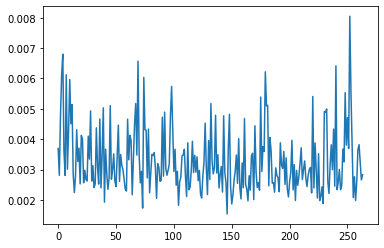

In [828]:
# plt.plot(ws[10])
plt.plot(np.mean(np.abs(subws[2]), axis=1))
plt.show()

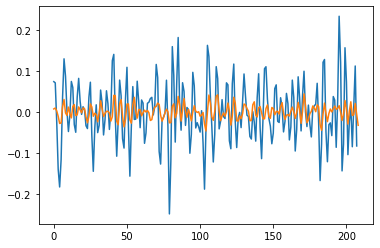

In [829]:
sub = 300
sub_w = 300
roi = 20
para = emoid_res_t.detach().cpu().numpy()

yhat = (para[sub].T@subws[sub_w,:,roi])

plt.plot(para[sub,roi,before:])
plt.plot(yhat)
plt.show()

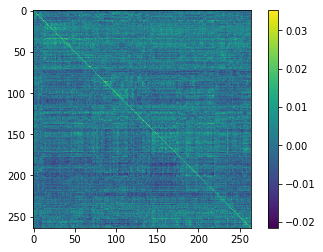

In [830]:
plt.imshow(subws[8])
plt.colorbar()
plt.show()

In [831]:
# a,b = np.triu_indices(264,1)
# subws2 = subws+np.transpose(subws, axes=(0,2,1))
# ec_t = torch.from_numpy(subws2[:,a,b]).float().cuda().reshape(620,int(264*263/2))
ec_t = torch.from_numpy(subws).float().cuda().reshape(620,264*264)

print(ec_t.shape)

torch.Size([620, 69696])


In [840]:
idcs = np.arange(620)
np.random.shuffle(idcs)

trainIdcs = idcs[:496]
testIdcs = idcs[496:]

Xtrain = ec_t[trainIdcs]
Xtest = ec_t[testIdcs]

# Xtrain_mu = torch.mean(Xtrain, dim=0, keepdim=True)
# Xtrain_sd = torch.std(Xtrain, dim=0, keepdim=True)

# Xtrain = (Xtrain-Xtrain_mu)/Xtrain_sd
# Xtest = (Xtest-Xtrain_mu)/Xtrain_sd

mx = torch.max(Xtrain)
Xtrain = (Xtrain)/mx
Xtest = (Xtest)/mx

Xtrain[torch.isnan(Xtrain)] = 0
Xtest[torch.isnan(Xtest)] = 0

w, _, _, _ = torch.linalg.lstsq(Xtrain, wrt_t[trainIdcs])

yhat = Xtest@w

print('Complete')

torch.mean((yhat-wrt_t[testIdcs])**2)**0.5

Complete


tensor(16.3993, device='cuda:0')

In [763]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1, max_iter=5000).fit(
    Xtrain.detach().cpu().numpy(), np.argmax(gen[trainIdcs], axis=1))
yhat = clf.predict(Xtest.detach().cpu().numpy())

print(np.mean(yhat == np.argmax(gen[testIdcs], axis=1)))

0.7258064516129032


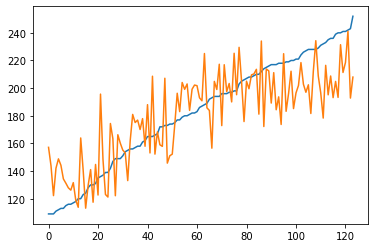

In [531]:
sortIdcs = np.argsort(age[testIdcs])

plt.plot(age[testIdcs][sortIdcs])
plt.plot(yhat[sortIdcs].detach().cpu().numpy())
plt.show()

In [401]:
import pickle

# with open('/home/anton/Documents/Tulane/Research/Work/LatSimEC/Models/EC1_incself.pkl', 'wb') as f:
#     pickle.dump(subws, f)
    
print('Complete')

Complete
